In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train = pd.read_csv('titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


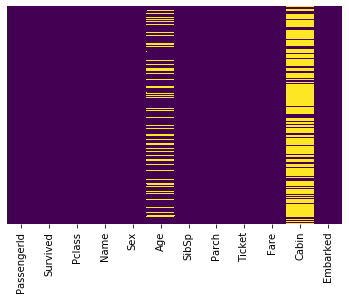

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
sns.set_style('whitegrid')

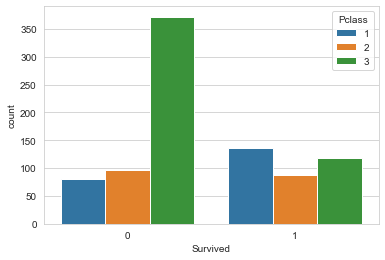

In [12]:
sns.countplot(x='Survived',hue='Pclass', data=train)

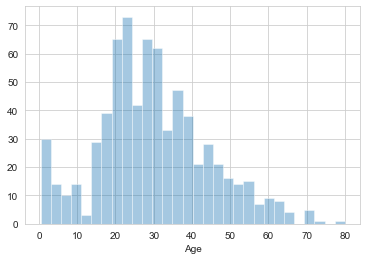

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

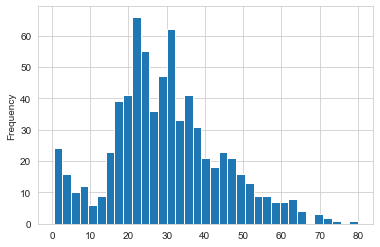

In [18]:
train['Age'].plot.hist(bins=35)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


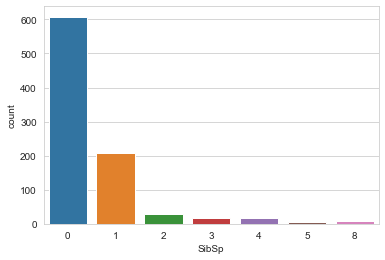

In [21]:
sns.countplot(x='SibSp',data=train)

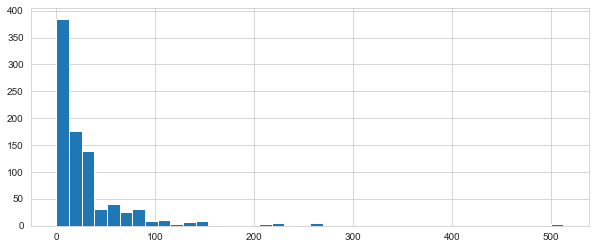

In [25]:
train['Fare'].hist(bins=40,figsize=[10,4])

In [1]:
import cufflinks as cf

In [3]:
cf.go_offline()

In [13]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

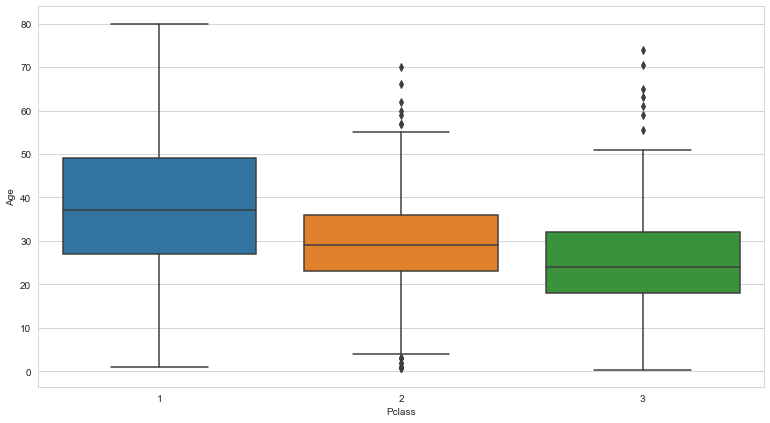

In [15]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [17]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        if Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

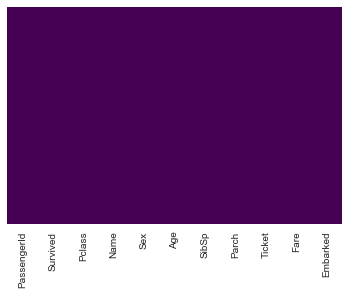

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
train.dropna(inplace=True)

In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [28]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [30]:
train = pd.concat([train,sex,embark],axis=1)

In [34]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [35]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [39]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [64]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [65]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()

In [52]:
logmodel.fit(X_train,y_train)

/Users/Michelle/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
prediction = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [59]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,prediction)

array([[148,  15],
       [ 36,  68]])